In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# A simple function to compute PCs, loadings, and variance explained

In [3]:
def our_pca(X,center=True):
    if center:
        X = X.apply(lambda x: x-x.mean()) # mean-centered 
    U,sigma,Vt = np.linalg.svd(X,full_matrices=False) # singular value decomposition X=U,sigma,v dot 
    PCs = U.dot(np.diag(sigma)) # loading dot producted  # (np.diag(sigma)):make matrix on diagno 
    PVE = sigma**2/(sigma**2).sum() # supose to be 1 
    return PCs, Vt, PVE

# Let's create some random data for two variables with n observations

In [4]:
n = 70 # 70 samples
z = np.random.randn(n)*np.sqrt(0.8) 
x1 = z + np.random.randn(n)*np.sqrt(0.2) 
x2 = z + np.random.randn(n)*np.sqrt(0.2)
X = pd.DataFrame(np.array([x1,x2]).T)
X.columns = ['x1','x2'] # relationship: find correlation
PCs, Vt, PVE = our_pca(X)

Have a look at the data and a bit about what our_pca returns

<Axes: xlabel='x1', ylabel='x2'>

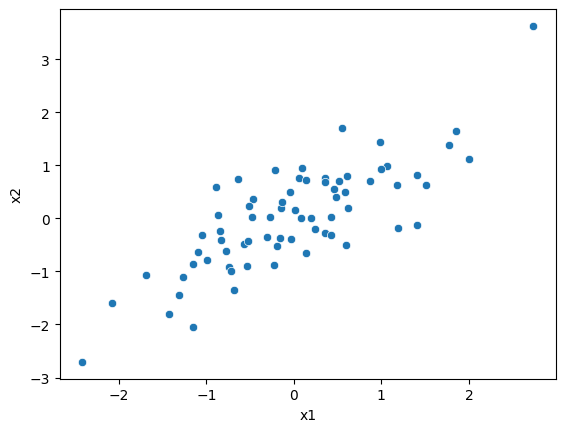

In [5]:
sns.scatterplot(x=X['x1'],y=X['x2']) # PC1: line to upper right

# We can compute and plot the projection of the data onto PC1

<Axes: xlabel='x1', ylabel='x2'>

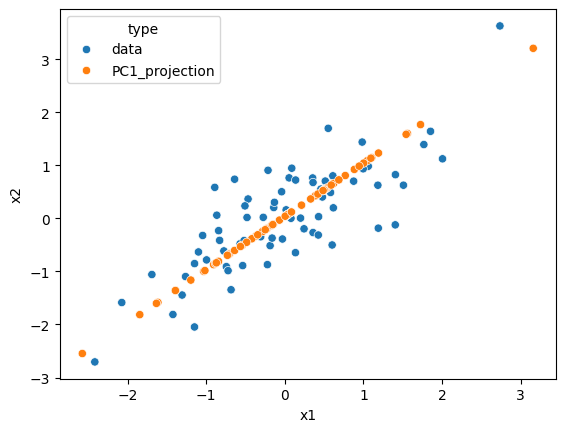

In [6]:
df_data = X.copy()
df_data['type'] = 'data'

A = np.outer(PCs[:,0],Vt[0]) # contribution of data from pc1
df_projection = pd.DataFrame(A + X.mean().to_numpy())
df_projection.columns = ['x1','x2']
df_projection['type'] = 'PC1_projection'

df = pd.concat([df_data, df_projection], ignore_index=True, sort=False)
sns.scatterplot(df, x='x1', y='x2', hue='type')

# Now let's look at some real data coming from weather stations in the NY region

In [7]:
weather_data = pd.read_csv('weather.csv',index_col=0)
weather_data

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
rownames,,,,,,,,,,,,,,,
1,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
2,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
3,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
4,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
5,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26111,LGA,2013,12,30,14,35.96,19.94,51.78,340.0,13.80936,21.86482,0.0,1017.1,10.0,2013-12-30T19:00:00Z
26112,LGA,2013,12,30,15,33.98,17.06,49.51,330.0,17.26170,21.86482,0.0,1018.8,10.0,2013-12-30T20:00:00Z
26113,LGA,2013,12,30,16,32.00,15.08,49.19,340.0,14.96014,23.01560,0.0,1019.5,10.0,2013-12-30T21:00:00Z


# Lots of data here...let's focus on the midnight hour
### We'll cover some of these table transformations and things in the next lecture, so don't worry about it for now

In [8]:
midnight_data = weather_data.loc[(weather_data['hour'] == 1)].copy()
midnight_data['day_number'] = pd.to_datetime(midnight_data['time_hour']).dt.dayofyear

midnight_temps = midnight_data[['origin','temp','day_number']].pivot_table(columns='day_number',index='origin').dropna(axis='columns')

midnight_temps

temp                                                          \
day_number    1      2      3      4      5      6      7      8      9     
origin                                                                      
EWR         39.02  26.06  28.04  28.94  33.08  33.98  37.94  32.00  33.98   
JFK         39.02  26.06  28.94  32.00  33.98  35.06  39.92  32.00  35.06   
LGA         39.92  26.96  30.02  33.98  35.06  37.04  41.00  37.94  41.00   

                   ...                                                   \
day_number    10   ...    355    356    357    358    359    360    361   
origin             ...                                                    
EWR         39.02  ...  42.98  62.06  60.08  37.94  23.00  28.94  30.92   
JFK         42.08  ...  46.04  51.98  53.06  39.92  24.98  30.92  33.08   
LGA         46.04  ...  51.08  53.06  60.08  39.02  24.08  30.02  33.98   

                                 
day_number    362    363    364  
origin                           
EWR         30.02  39.02  37.94  
JFK         33.98  42.08  42.08  
LGA         37.04  44.96  42.08  

[3 rows x 363 columns]

In [9]:
PCs, Vt, PVE = our_pca(midnight_temps.T)

# PC1 vs time

<Axes: xlabel='day_number', ylabel='PC1'>

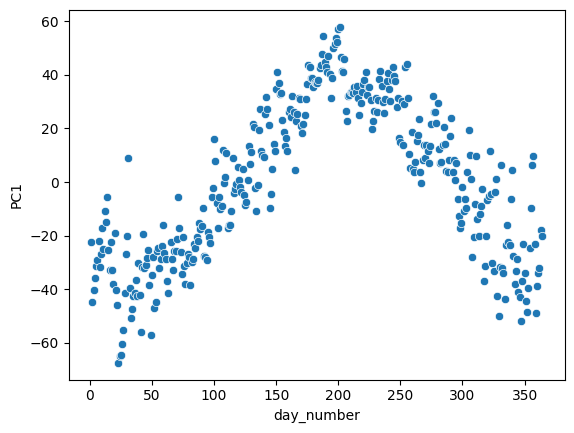

In [10]:
df_PCs = pd.DataFrame(PCs)
df_PCs.columns = ['PC%d'%(i+1) for i in range(PCs.shape[1])]
df_PCs

sns.scatterplot(x=midnight_temps.columns.get_level_values(1), y=df_PCs['PC1'])

# PC2 vs time

<Axes: xlabel='day_number', ylabel='PC2'>

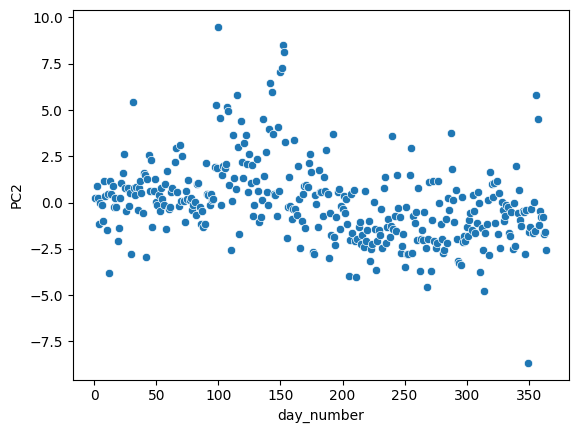

In [11]:
sns.scatterplot(x=midnight_temps.columns.get_level_values(1), y=df_PCs['PC2'])

# PC1 vs PC2

<Axes: xlabel='PC1', ylabel='PC2'>

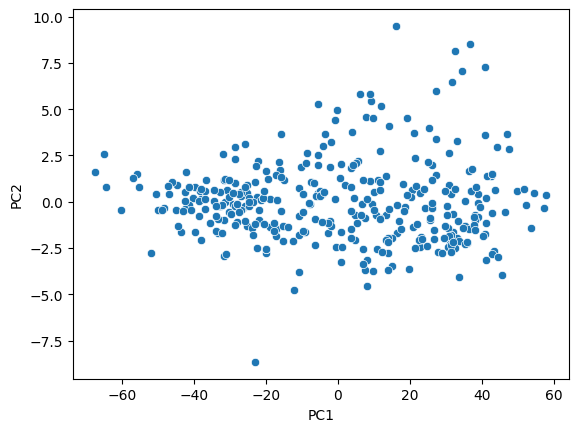

In [12]:
sns.scatterplot(x=df_PCs['PC1'], y=df_PCs['PC2'])

# Percent variance explained by each component

In [13]:
PVE

array([0.99084944, 0.00564712, 0.00350343])